# Time Series Forecastin

In [1]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

# Load Data Frame

In [2]:
# Load Train Data Set
df1 = pd.read_csv('Google_Stock_Price_Train.csv')
df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# Load Test Data Set
df2 = pd.read_csv('Google_Stock_Price_Test.csv')
df2.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


# Data Info

In [4]:
# Train Data Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
# Test Data Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [6]:
# Checking Null of Train Data
df1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
# Checking Null of Test Data
df2.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data Transforming

In [8]:
# Conveting the Date and Time for Time Seris Forcasting
df1['Date'] = pd.to_datetime(df1['Date']) # Train
df2['Date'] = pd.to_datetime(df2['Date']) # Test

In [9]:
# Changing the Data Types
df1['Close'] = df1['Close'].str.replace(',', '').astype(float)  # Rpelace the Comma into an Empty Space (Train)
df1['Volume'] = df1['Volume'].str.replace(',', '').astype(int)  # Rpelace the Comma into an Empty Space (Train)
df2['Volume'] = df2['Volume'].str.replace(',', '').astype(int)  # Rpelace the Comma into an Empty Space (Test)

# Visualization

In [10]:
# Marge the Data Frame for Visualization
fig = go.Figure()

# Train
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['Close'],
    mode='lines',
    name='Train',
    line=dict(color='blue')
))

# Test
fig.add_trace(go.Scatter(
    x=df2['Date'],
    y=df2['Close'],
    mode='lines',
    name='Test',
    line=dict(color='orange')
))

 # Layout
fig.update_layout(
    title="Google Stock Price (Train VS Test)",
    title_font_size=18,
    xaxis_title="Date",
    yaxis_title="Close Rate",
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_text='Dataset',
    width=1220,
    height=500
)

fig.show()

# Exploratory Data Analysis (EDA)

In [11]:
# Calculating Mean, Median, Std, Variance, Min or Max
stats1 = df1[['Open', 'High', 'Low', 'Close']].agg(['mean', 'median', 'std', 'var', 'min', 'max']) # Train
stats2 = df2[['Open', 'High', 'Low', 'Close']].agg(['mean', 'median', 'std', 'var', 'min', 'max']) # Test

print("The Statistics for Basic Stock Price:")
print(stats1)
print(stats2)

The Statistics for Basic Stock Price:
                Open          High           Low         Close
mean      533.709833    537.880223    529.007409    712.669666
median    537.470000    540.750000    532.990000    695.675000
std       151.904442    153.008811    150.552807    164.752591
var     23074.959474  23411.696203  22666.147797  27143.416170
min       279.120000    281.210000    277.220000    491.200000
max       816.680000    816.680000    805.140000   1216.830000
              Open        High         Low       Close
mean    807.526000  811.926500  801.949500  807.904500
median  806.995000  808.640000  801.530000  806.110000
std      15.125428   14.381198   13.278607   13.210088
var     228.778583  206.818856  176.321405  174.506426
min     778.810000  789.630000  775.800000  786.140000
max     837.810000  841.950000  827.010000  835.670000


In [12]:
# Set Date as Index
df1 = df1.set_index('Date') # Train
df1 = df1.sort_index()

df2 = df2.set_index('Date') # Test
df2 = df2.sort_index()

In [13]:
# Trending Plot
fig = go.Figure()

# Train
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1['Close'],
    mode='lines',
    name='Train Closing Price',
    line=dict(color='blue')
))

# Test
fig.add_trace(go.Scatter(
    x=df2.index,
    y=df2['Close'],
    mode='lines',
    name='Test Closing Price',
    line=dict(color='orange')
))

# Layout
fig.update_layout(
    title="Trending Google Stock Price",
    title_font_size=18,
    xaxis_title="Date",
    yaxis_title="Closing Price",
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_text='Dataset',
    width=1220,
    height=500
)

fig.show()

In [14]:
# Rolling Volatility
df1['Volatility'] = df1['Close'].rolling(window=30).std() # Train
df2['Volatility'] = df2['Close'].rolling(window=10).std() # Test

fig = go.Figure()

# Train Volatility
fig.add_trace(go.Scatter(
    x=df1.index, 
    y=df1['Volatility'], 
    mode='lines',
    name='30 Days Rolling Volatility',
    line=dict(color='red')
))

# Test Volatility
fig.add_trace(go.Scatter(
    x=df2.index, 
    y=df2['Volatility'], 
    mode='lines',
    name='10 Days Rolling Volatility',
    line=dict(color='skyblue')
))

# layout
fig.update_layout(
    title="Google Stock Price Volatility",
    xaxis_title="Date",
    yaxis_title="Volatility (Std Dev)",
    template="plotly_white",
    width=1220,
    height=500
)
fig.show()

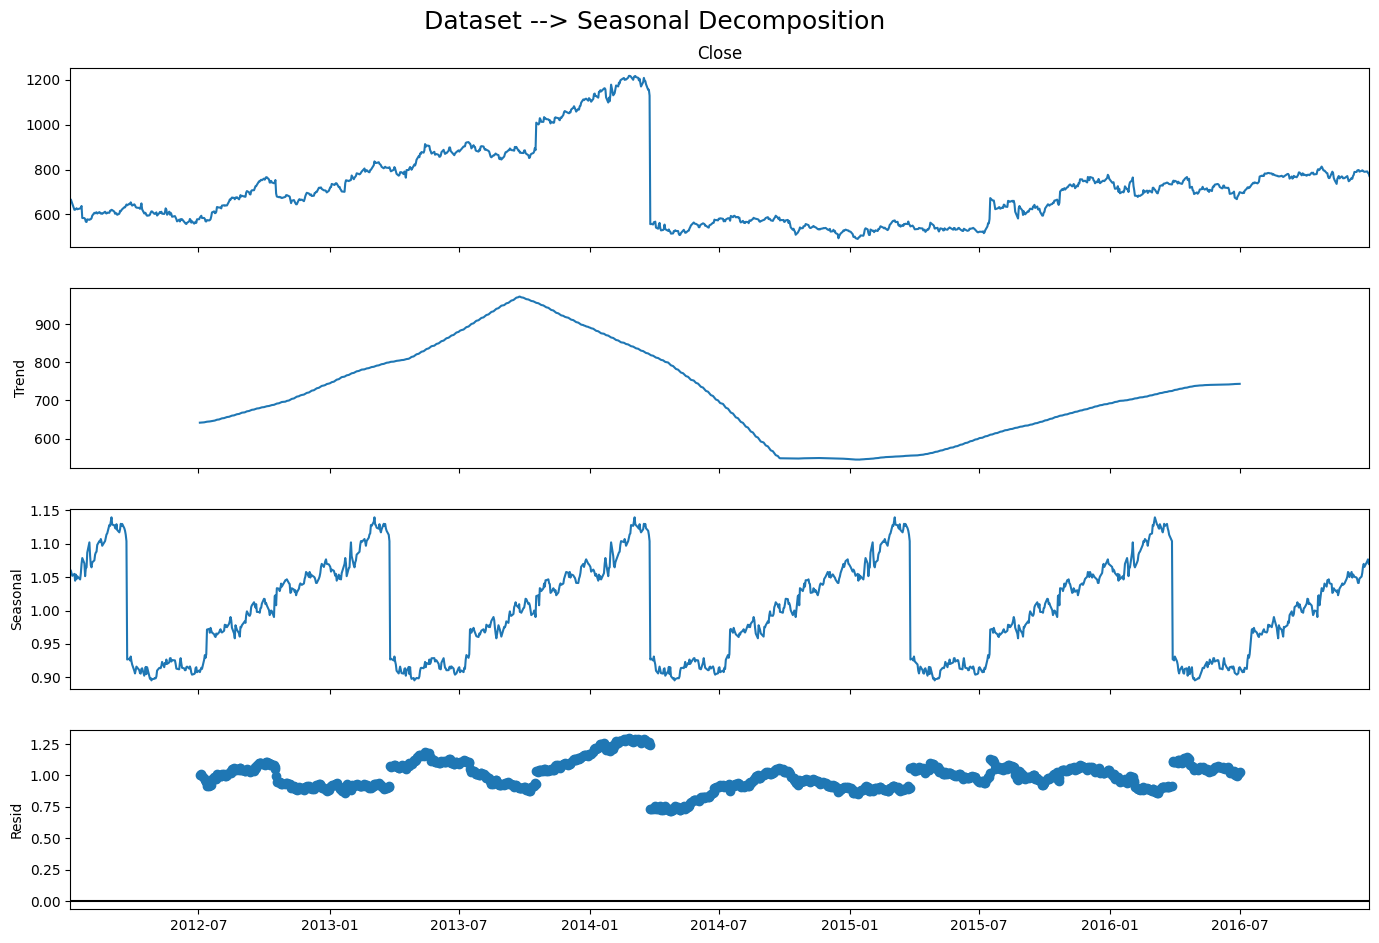

In [15]:
# Seasonality Plot-01
decomposition = seasonal_decompose(df1['Close'], model='multiplicative', period=252) # Train

fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.suptitle("Dataset --> Seasonal Decomposition", fontsize=18)
plt.show()

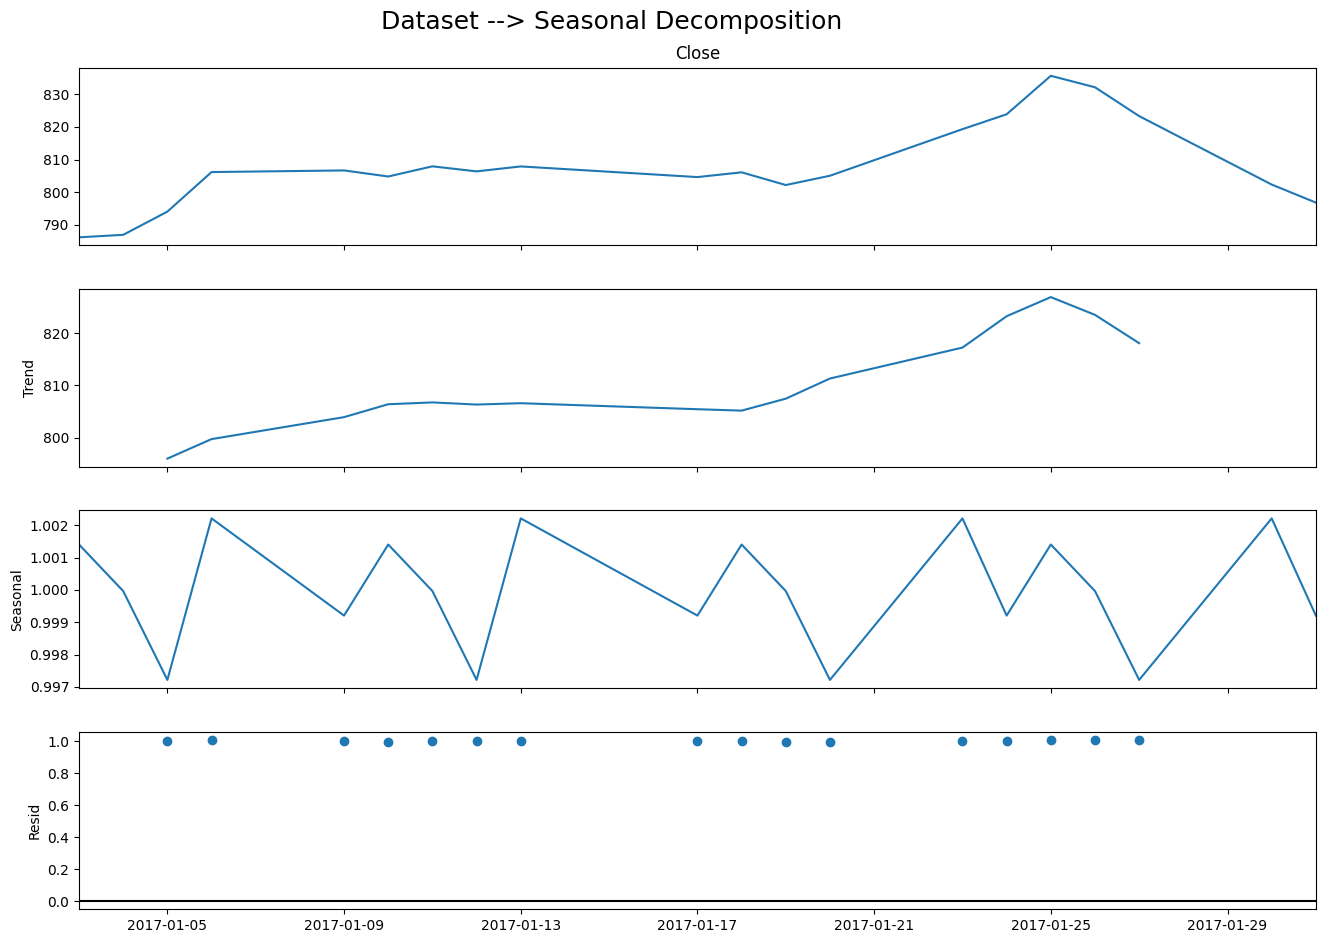

In [16]:
# Seasonality Plot-02
decomposition = seasonal_decompose(df2['Close'], model='multiplicative', period=5) # Test

fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.suptitle("Dataset --> Seasonal Decomposition", fontsize=18)
plt.show()

In [17]:
# Stock Closing Price Plot
fig = go.Figure()

# Train
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1['Close'],
    mode='lines',
    name='Train Closing Price',
    line=dict(color='blue')
))

# Test
fig.add_trace(go.Scatter(
    x=df2.index,
    y=df2['Close'],
    mode='lines',
    name='Test Closing Price',
    line=dict(color='red')
))

# Layout
fig.update_layout(
    title="Google Stock Closing Prices Over Time",
    title_font_size=18,
    xaxis_title="Date",
    yaxis_title="Closing Price",
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_text='Dataset',
    width=1220,
    height=500
)

fig.show()

# Arima Statistical

In [18]:
# Fit an Arima Model
model = ARIMA(df1['Close'], order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5496.083
Date:                Fri, 03 Oct 2025   AIC                          11004.166
Time:                        04:32:29   BIC                          11034.985
Sample:                             0   HQIC                         11015.748
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0345      0.028      1.221      0.222      -0.021       0.090
ar.L2         -0.0007      0.080     -0.009      0.993      -0.158       0.156
ar.L3          0.0165      0.030      0.552      0.5

In [19]:
# Forecast on Test Data
steps = len(df2)
forecast = model_fit.forecast(steps=steps)

df2['ARIMA_Forecast'] = forecast.values


fig = go.Figure()

# Train
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1['Close'],
    mode='lines',
    name='Train Closing Price',
    line=dict(color='red')
))

# Test
fig.add_trace(go.Scatter(
    x=df2.index,
    y=df2['Close'],
    mode='lines',
    name='Test Closing Price',
    line=dict(color='green')
))

# Test (ARIMA Forecast)
fig.add_trace(go.Scatter(
    x=df2.index,
    y=df2['ARIMA_Forecast'],
    mode='lines',
    name='ARIMA Forecast',
    line=dict(color='blue')
))

# Layout
fig.update_layout(
    title="ARIMA Forecast vs Actual (Google Stock)",
    title_font_size=18,
    xaxis_title="Date",
    yaxis_title="Closing Price",
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_text='Dataset',
    width=1220,
    height=500
)

fig.show()

In [20]:
# Evaluate Performance
rmse = np.sqrt(mean_squared_error(df2['Close'], df2['ARIMA_Forecast']))
mae = mean_absolute_error(df2['Close'], df2['ARIMA_Forecast'])
mape = np.mean(np.abs((df2['Close'] - df2['ARIMA_Forecast']) / df2['Close'])) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 38.97
MAE: 36.77
MAPE: 4.53%


# ML Model

In [21]:
# Train Data
train_prophet = df1.reset_index()[['Date', 'Close']]
train_prophet.columns = ['ds', 'y']

# Test Data
test_prophet = df1.reset_index()[['Date', 'Close']]
test_prophet.columns = ['ds', 'y']

In [22]:
# Fit Model
prophet_model = Prophet(daily_seasonality=True)

prophet_model.fit(train_prophet)

04:32:30 - cmdstanpy - INFO - Chain [1] start processing
04:32:30 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# Prediction Macking
future = prophet_model.make_future_dataframe(periods=len(test_prophet))

forecast = prophet_model.predict(future)

forecast_test = forecast[['ds', 'yhat']].set_index('ds').join(test_prophet.set_index('ds'))
forecast_test.tail()

,yhat,y
ds,,
2020-06-06,1116.067829,NaN
2020-06-07,1114.846931,NaN
2020-06-08,1102.379209,NaN
2020-06-09,1102.559801,NaN
2020-06-10,1101.396657,NaN


In [24]:
# Forecasting
fig = go.Figure()

# Train
fig.add_trace(go.Scatter(
    x=train_prophet['ds'], 
    y=train_prophet['y'], 
    mode='lines',
    name='Train',
    line=dict(color='blue')
))

# Test
fig.add_trace(go.Scatter(
    x=test_prophet['ds'], 
    y=test_prophet['y'], 
    mode='lines',
    name='Test',
    line=dict(color='orange')
))

# Prophet Forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines',
    name='Prophet Forecast',
    line=dict(color='green')
))

# Layout
fig.update_layout(
    title="Prophet Forecast vs Actual (Google Stock)",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    template="plotly_white",
    width=1220,
    height=600
)

fig.show()

In [25]:
# Evaluat
y_true = test_prophet['y'].values
y_pred = forecast_test['yhat'].dropna().values[:len(y_true)]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred)/y_true))*100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 56.98
MAE: 39.01
MAPE: 5.52%


# Rolling Window Evaluation

In [26]:
# Rolling Window Evaluation
history = list(df1['Close'])

In [27]:
# ARIMA Rolling
predictions = []

for t in range(len(df2)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(df2['Close'].iloc[t])

# Evaluate
rmse = np.sqrt(mean_squared_error(df2['Close'], predictions))
print(f"Rolling Window ARIMA RMSE: {rmse:.2f}")

Rolling Window ARIMA RMSE: 8.27


In [28]:
# Prophet Rolling
predictions_prophet = []

for i in range(len(df2)):
    temp_train = pd.concat([train_prophet, test_prophet.iloc[:i]])
    
    model = Prophet(daily_seasonality=True)
    model.fit(temp_train)

    future = model.make_future_dataframe(periods=1, freq='D')
    forecast = model.predict(future)
    yhat = forecast['yhat'].iloc[-1]
    predictions_prophet.append(yhat)

y_true = test_prophet['y'].iloc[:len(predictions_prophet)]
y_pred = predictions_prophet

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Rolling Window Prophet RMSE: {rmse_prophet:.2f}")

04:32:36 - cmdstanpy - INFO - Chain [1] start processing
04:32:37 - cmdstanpy - INFO - Chain [1] done processing
04:32:37 - cmdstanpy - INFO - Chain [1] start processing
04:32:38 - cmdstanpy - INFO - Chain [1] done processing
04:32:38 - cmdstanpy - INFO - Chain [1] start processing
04:32:38 - cmdstanpy - INFO - Chain [1] done processing
04:32:39 - cmdstanpy - INFO - Chain [1] start processing
04:32:39 - cmdstanpy - INFO - Chain [1] done processing
04:32:40 - cmdstanpy - INFO - Chain [1] start processing
04:32:40 - cmdstanpy - INFO - Chain [1] done processing
04:32:40 - cmdstanpy - INFO - Chain [1] start processing
04:32:41 - cmdstanpy - INFO - Chain [1] done processing
04:32:41 - cmdstanpy - INFO - Chain [1] start processing
04:32:42 - cmdstanpy - INFO - Chain [1] done processing
04:32:42 - cmdstanpy - INFO - Chain [1] start processing
04:32:42 - cmdstanpy - INFO - Chain [1] done processing
04:32:43 - cmdstanpy - INFO - Chain [1] start processing
04:32:43 - cmdstanpy - INFO - Chain [1]

Rolling Window Prophet RMSE: 231.44


# Evaluation & Comparison

In [29]:
# Standard ARIMA Results
y_true_arima = df2['Close']
y_pred_arima = df2['ARIMA_Forecast']

rmse_arima = np.sqrt(mean_squared_error(y_true_arima, y_pred_arima))
mae_arima = mean_absolute_error(y_true_arima, y_pred_arima)
mape_arima = np.mean(np.abs((y_true_arima - y_pred_arima) / y_true_arima)) * 100

# Rolling ARIMA Results
y_true_roll = df2['Close']
y_pred_roll = predictions

rmse_roll = np.sqrt(mean_squared_error(y_true_roll, y_pred_roll))
mae_roll = mean_absolute_error(y_true_roll, y_pred_roll)
mape_roll = np.mean(np.abs((y_true_roll - y_pred_roll) / y_true_roll)) * 100

# Prophet Results
y_true_prophet = test_prophet['y'].iloc[:len(predictions_prophet)]
y_pred_prophet = predictions_prophet

rmse_prophet = np.sqrt(mean_squared_error(y_true_prophet, y_pred_prophet))
mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet)
mape_prophet = np.mean(np.abs((y_true_prophet - y_pred_prophet) / y_true_prophet)) * 100

# Comparison Table
results = pd.DataFrame({
    "Model": ["ARIMA", "Rolling ARIMA", "Prophet"],
    "RMSE": [rmse_arima, rmse_roll, rmse_prophet],
    "MAE": [mae_arima, mae_roll, mae_prophet],
    "MAPE (%)": [mape_arima, mape_roll, mape_prophet]
})

results = results.round(2)

print(results)

           Model    RMSE     MAE  MAPE (%)
0          ARIMA   38.97   36.77      4.53
1  Rolling ARIMA    8.27    6.14      0.76
2        Prophet  231.44  228.92     37.73


### Conclusion
    Project Summary:

    🔹 I performed a time series forecasting task using Google stock price data.
    🔹 The data was preprocessed and explored to understand trends, seasonality, and patterns.
    🔹 ARIMA model was applied for forecasting stock prices.
    🔹 The model performance was evaluated using error metrics such as RMSE and MAE.

    Challenges Faced:
       • Handling missing values and ensuring data quality.
       • Identifying the right parameters for ARIMA (p, d, q).
       • Avoiding overfitting while maintaining forecast accuracy.

    Key Learnings:
       • Time series forecasting requires both statistical understanding and careful preprocessing.
       • ARIMA is effective for short-term forecasting, but struggles with sudden market fluctuations.
       • Visualization is essential to interpret trends and seasonality.

    Future Improvements:
       • Try advanced models like SARIMA, Prophet, or LSTM for comparison.
       • Perform automated hyperparameter tuning.
       • Use more features (e.g., trading volume, external factors) for richer predictions.